<center><h1>RAPID 2 Interactive Data Visualization and Analysis Interface</h1></center>
<p>
<center><h3>Mansoor Ani Najeeb<sup>1</sup>, Rodolfo Keesey<sup>1</sup>, Margaret Zeile<sup>1</sup>, Zhi Li<sup>2</sup>, Venkateswaran Shekar<sup>3</sup>, Nicholas Leiby<sup>4</sup>, Matthias Zeller<sup>4</sup>, Emory Chan<sup>2</sup>, Joshua Schrier<sup>1,5</sup>, Alexander J. Norquist<sup>1</sup></h3></center>
<br>

1. Department of Chemistry, Haverford College, 370 Lancaster Avenue, Haverford, Pennsylvania 19041, USA
2. Molecular Foundry, Lawrence Berkeley National Laboratory, 1 Cyclotron Road, Berkeley, California 94720, USA
3. Department of Computer Science, Haverford College, 370 Lancaster Avenue, Haverford, Pennsylvania 19041, USA
4. Two Six Technologies, 901 N. Stuart Street, Arlington, Virginia, 22203, USA
4. Department of Chemistry, Purdue University, West Lafayette IN 47907, USA
5. Department of Chemistry, Fordham University, 441 E. Fordham Road, The Bronx, New York, 10458, USA

# Visualization

If accessing this jupyter notebook via mybinder.org, please wait for the notebook to load completely, it may take around 10-20 minutes for mybinder to load.

1) To display visualizations click on the "Cell" menu above and click on "Run All". 

2) It may take a few minutes on an average for the cells to process. If not, refresh the page and try Step 1 again


In [31]:
import plotly.graph_objects as go
import pandas as pd
import src.plots as plots
import src.cif_plots as cif_plots
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Solvent Type vs. Antisolvent concentration

In [10]:
import plotly.express as px
# temps
data = pd.read_excel('./data/only4_diffusion_topcolmn.xlsx', engine='openpyxl')
data = data.rename(columns={'[DCM]': 'Antisolvent [M]', '[Solvent]': 'Solvent [M]', 'Solvent': 'Solvent Type'})
fig = px.scatter(data, x="Solvent Type", y="Antisolvent [M]", color="Amine",
                 size='Solvent [M]', hover_data=['Solvent [M]'], width=1000, height=600)
fig.show()

# Max Amine vs. Max PbI

In [24]:
sp = plots.SolubilityPlot('./data/Solubility_Data_for_RAPID2 - mmol.csv')
sp.plot()

In [27]:
%%html
<style>
.jupyter-widgets.widget-tab > .p-TabBar .p-TabBar-tab {
    flex: 0 1 auto
}
</style>


In [28]:
ro = plots.ReactionOutcomeWidget('./data/reaction_outcome.csv')
display(ro.render_plot())

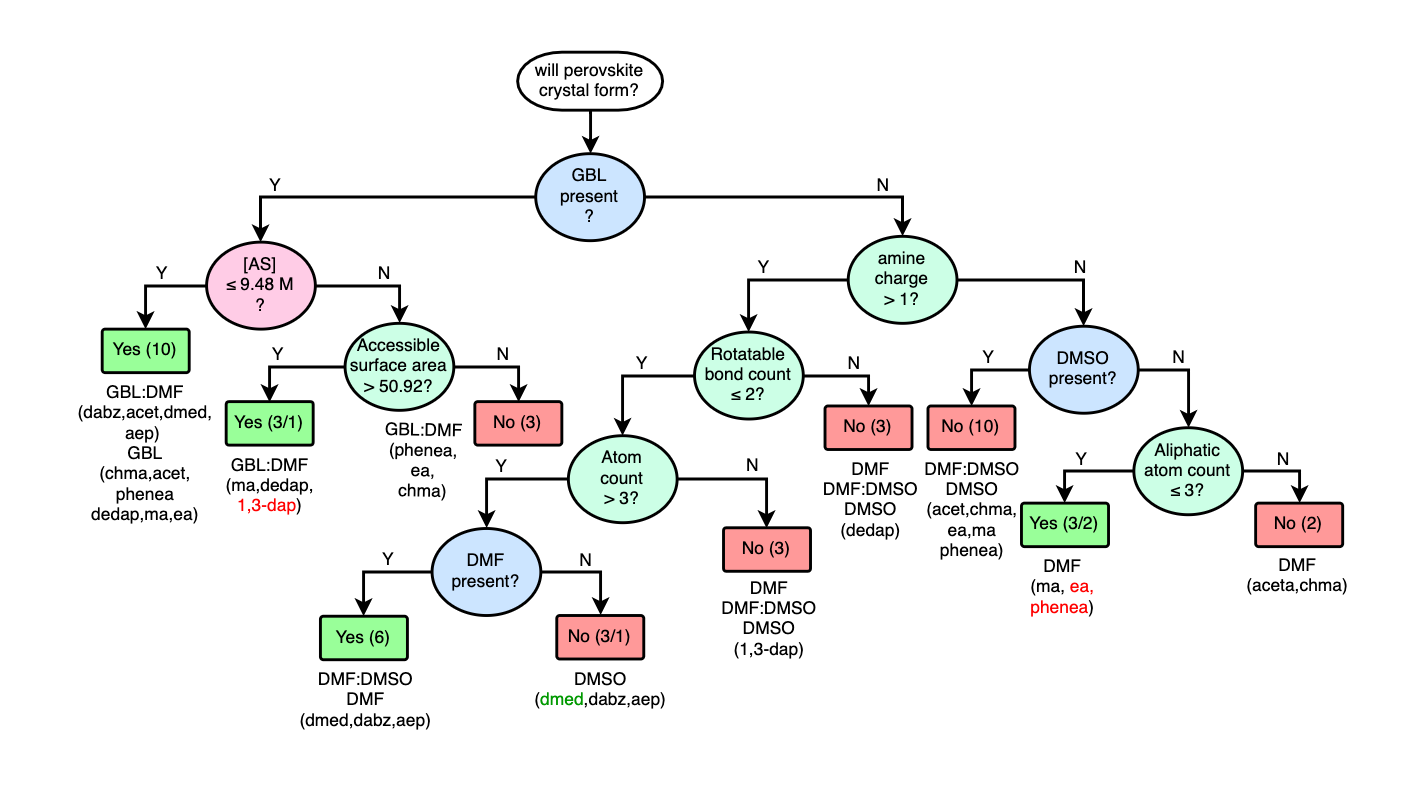

In [30]:
from IPython.display import Image
Image(filename='./data/images/decision_tree.png')

In [36]:

cif_paths = ['./data/cifs/ajn19-019.cif','./data/cifs/ajn21-003.cif',
             './data/cifs/ajn20-016.cif','./data/cifs/ajn19-018.cif',
             './data/cifs/ajn20-015.cif','./data/cifs/ajn21-004.cif',
             './data/cifs/ajn19-015.cif','./data/cifs/ajn19-021.cif','./data/cifs/ajn21-002.cif']
fig_names = ['[dmedH2]3[Pb2I9][CO2H]','[dmedH2]3[Pb3I12]·4DMF',
             '[dmedH2]2[Pb3I10]·2DMSO','[dedapH]2[PbI6]',
             '[dabzH2][PbI3]2·2GBL·2DMF','[dabzH2][PbI3]2·4DMF',
             '[dabzH2][PbI3]2·4DMSO', '[aepH2]2[Pb3I10]·2DMF','[aepH2]4[Pb3I12][CO2H]2·2DMSO',]
#doi_values = {'AcetPbI3':'10.5517/cc1j04rf', 'CHMA2PbI4': '10.5517/ccdc.csd.cc1j88bd'}
doi_values = {}
fig4 = cif_plots.JsMolFigure(cif_paths, fig_names, doi_values, widget_side=600)
fig4.plot